In [ ]:
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('datacovid.csv')

In [ ]:
df.head()

,tweet,translate
0,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...","Alert Covid-19 teranding,\nBeware of vaccine s..."
1,"Sudah vaksin dosis 2, kenapa harus rest pcr un...","Already vaccine dose 2, why should Rest PCR fo..."
2,Yang tidak percaya covid tpi tetap ngikutin pr...,Who does not believe Covid TPI still follows o...
3,Berita \ntahun 2020: penuh dengan terpapar pen...,News\nYear 2020: Full with exposure to disease...
4,"Yg satu pengen nguasai mars, yg satu lg pengen...","One one who wants to master the Mars, which on..."


In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

df['translate'] = df['translate'].apply(stemming_data)

In [ ]:
dataset = list(df['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0:
        total_positif += 1
        status.append('positive')
    else:
        total_negatif += 1
        status.append('negative')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 4359
Negatif = 4218

Total Data : 8577


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
df['klasifikasi'] = status
df

,tweet,translate,klasifikasi
0,"Waspada COVID-19 Melandai,\nWaspada Tukang Jua...","alert covid-19 teranding,\nbeware of vaccine s...",negative
1,"Sudah vaksin dosis 2, kenapa harus rest pcr un...","already vaccine dose 2, why should rest pcr fo...",negative
2,Yang tidak percaya covid tpi tetap ngikutin pr...,who does not believe covid tpi still follows o...,negative
3,Berita \ntahun 2020: penuh dengan terpapar pen...,news\nyear 2020: full with exposure to disease...,positive
4,"Yg satu pengen nguasai mars, yg satu lg pengen...","one one who wants to master the mars, which on...",positive
...,...,...,...
8572,Data dari WHO tanggal 5 Mei 2020:\n\nTotal kas...,"data from who on may 5, 2020:\n\ntotal covid-1...",positive
8573,indonesia Harus belajar dari malaysia menghad...,indonesia must learn from malaysia to face # c...,negative
8574,"Tahun 2020, semoga saja agustus udah selesai s...","in 2020, hopefully the august has finished all...",negative
8575,saya ingat kata-kata salah seorang berpendidik...,i remember the words of one educated. this pan...,negative


In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

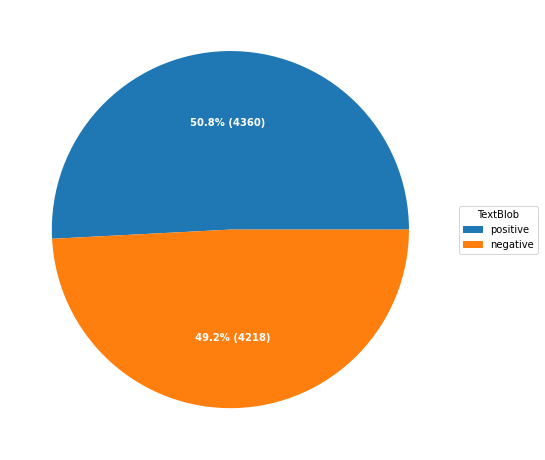

In [ ]:
label = ['positive', 'negative',]
count_data = [total_positif+1, total_negatif+1,]

show_pie(label, count_data, "TextBlob")

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

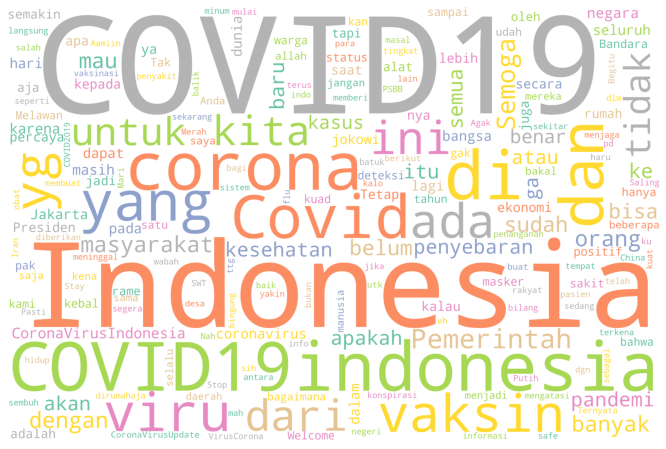

In [ ]:
all_words = ' '.join([tweets for tweets in df['tweet']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
status.to_excel('klasifikasi.xlsx',index=False)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset = df.drop(['tweet'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'positive'):
      set_positif.append(n)
    elif(n[1] == 'negative'):
      set_negatif.append(n)
    

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif 

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

NameError: ignored

In [ ]:
dataset = list(df['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'positive':
        total_positif += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 2778
Netral = 0
Negatif = 2642

Total Data : 5420


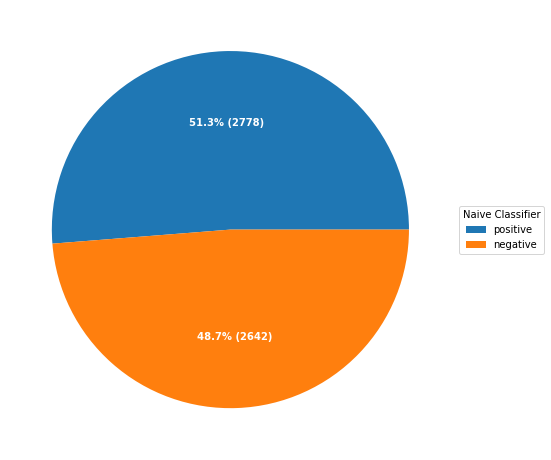

In [ ]:
label = ['positive', 'negative',]
count_data = [total_positif+1, total_negatif+1,]

show_pie(label, count_data, "Naive Classifier")

In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
df['klasifikasi_bayes'] = status

ValueError: ignored